# Analysis q_value_map

### TODO
增加坐标轴统一

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme()

In [16]:
import os
# read maps
data_list = []
data_gap = 5000
data_gap_show = 5000
data_drop_out_num = int(data_gap_show/data_gap)

data_path = r'C:\Users\helei\Documents\GitHub\UAV_Navigation_DRL_AirSim\logs\SimpleAvoid_SimpleMultirotor_2D\2022_03_12_10_09\data'

for i in range(1, 1000):
    if os.path.exists(data_path + '\q_value_map_{}.npy'.format(int(i*data_gap))):
        data = np.load(data_path + '\q_value_map_{}.npy'.format(int(i*data_gap)))
        data_list.append(data)
        print('get data {}'.format(int(i*data_gap)))
    else:
        print('data read finish...')
        break

print('Get {} array'.format(i-1))
plot_num = math.floor(((i-1)*data_gap)/data_gap_show)  # 向下取整得到画图数
print('{} of them will be ploted'.format(plot_num))

column_num = 4
row_num = math.ceil(plot_num/column_num)
print('r {} c {}'.format(row_num, column_num))

get data 5000
get data 10000
get data 15000
get data 20000
get data 25000
get data 30000
get data 35000
get data 40000
get data 45000
get data 50000
get data 55000
get data 60000
get data 65000
get data 70000
get data 75000
get data 80000
get data 85000
get data 90000
get data 95000
get data 100000
data read finish...
Get 20 array
20 of them will be ploted
r 5 c 4


In [17]:
def plot_heat_map(title, data_index, save_name):
    fig, axes = plt.subplots(row_num, column_num, figsize=(22, row_num*4))
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=(0, 0, 1, 0.98))

    for i in range(column_num*row_num):
        index_x = int(i/column_num)
        index_y = int(i%column_num)
        # print(index_x, index_y)
        if i < plot_num:
            if row_num == 1:
                sns.heatmap(ax=axes[index_y], data=data_list[(i+1)*data_drop_out_num - 1][data_index, :, :])
                axes[index_y].set_title('time step: {}'.format(int((i+1)*data_gap_show)))
                axes[index_y].get_xaxis().set_visible(False)
                axes[index_y].get_yaxis().set_visible(False)
            else:
                sns.heatmap(ax=axes[index_x, index_y], data=data_list[(i+1)*data_drop_out_num - 1][data_index, :, :])
                axes[index_x, index_y].set_title('time step: {}'.format(int((i+1)*data_gap_show)))
                axes[index_x, index_y].get_xaxis().set_visible(False)
                axes[index_x, index_y].get_yaxis().set_visible(False)
        else:
            if row_num == 1:
                plt.delaxes(axes[index_y])
            else:
                plt.delaxes(axes[index_x, index_y])

    plt.savefig(data_path + '{}-{}'.format(data_index, save_name), dpi=300)

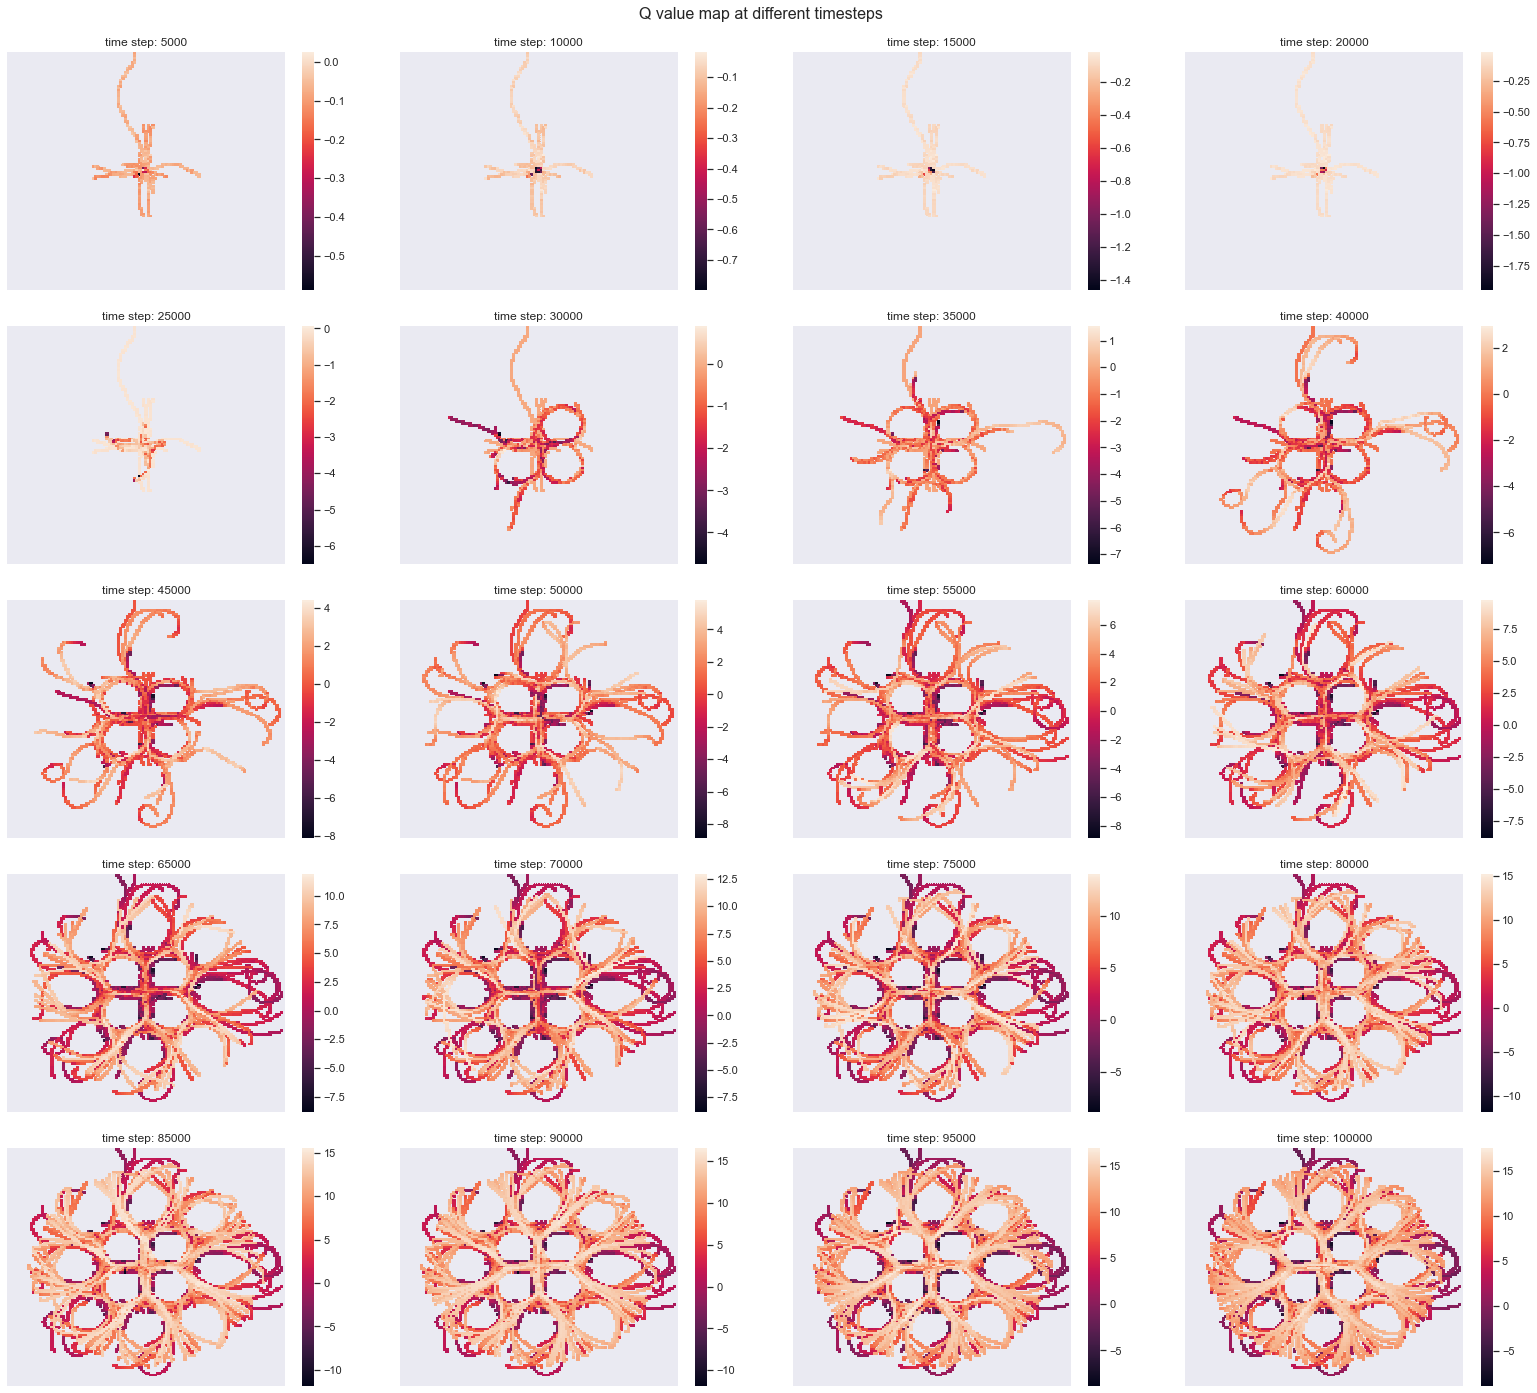

In [18]:
plot_heat_map('Q value map at different timesteps', 0, 'q_values')
# plot_heat_map('Action 0 at different timesteps', 1, 'action_0')
# plot_heat_map('Action 1 at different timesteps', 2, 'action_1')
# plot_heat_map('Reward at different timesteps', 4, 'reward')

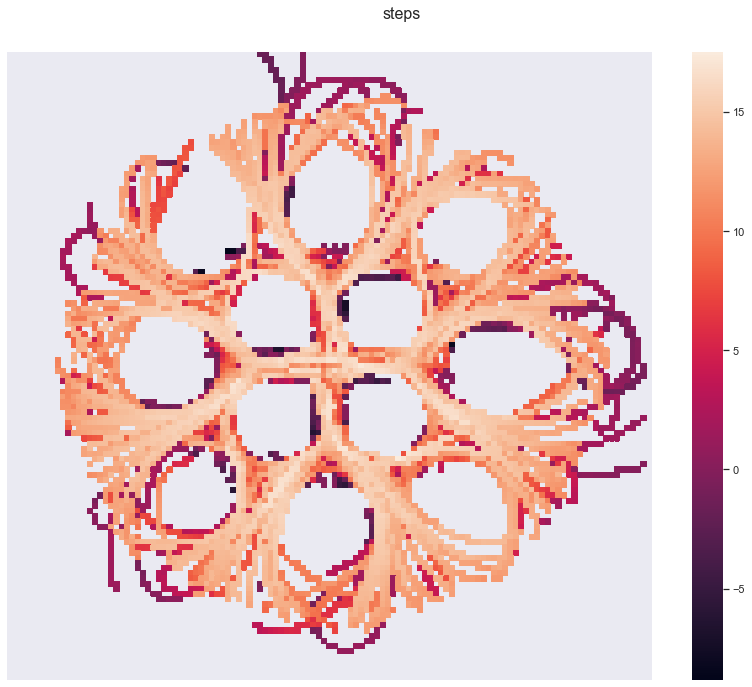

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
fig.suptitle('steps', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.98))
sns.heatmap(data=data_list[-1][0, :, :])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig(data_path + '3-steps', dpi=300)

In [20]:
def plot_heat_map_step(title, data_index, save_name, value_min, value_max):
    fig, axes = plt.subplots(row_num, column_num, figsize=(22, row_num*4))
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=(0, 0, 1, 0.98))

    for i in range(column_num*row_num):
        index_x = int(i/column_num)
        index_y = int(i%column_num)
        if i < plot_num:
            if row_num == 1:
                data_plot = data_list[i*data_drop_out_num][data_index, :, :].copy()
                for j in range(1, data_drop_out_num):
                    data_new = data_list[i*data_drop_out_num+j][data_index, :, :].copy()
                    data_plot[np.isfinite(data_new)] = data_new[np.isfinite(data_new)]
                sns.heatmap(ax=axes[index_y], data=data_plot, vmin=value_min, vmax=value_max)
                
                axes[index_y].set_title('time step: {}'.format(int((i+1)*data_gap_show)))
                axes[index_y].get_xaxis().set_visible(False)
                axes[index_y].get_yaxis().set_visible(False)
            else:
                data_plot = data_list[i*data_drop_out_num][data_index, :, :].copy()
                for j in range(1, data_drop_out_num):
                    data_new = data_list[i*data_drop_out_num+j][data_index, :, :].copy()
                    data_plot[np.isfinite(data_new)] = data_new[np.isfinite(data_new)]
                sns.heatmap(ax=axes[index_x, index_y], data=data_plot, vmin=value_min, vmax=value_max)
                
                axes[index_x, index_y].set_title('time step: {}'.format(int((i+1)*data_gap_show)))
                axes[index_x, index_y].get_xaxis().set_visible(False)
                axes[index_x, index_y].get_yaxis().set_visible(False)
        else:
            if row_num == 1:
                plt.delaxes(axes[index_y])
            else:
                plt.delaxes(axes[index_x, index_y])

    plt.savefig(data_path + '{}-{}'.format(data_index, save_name), dpi=300)

<AxesSubplot:>

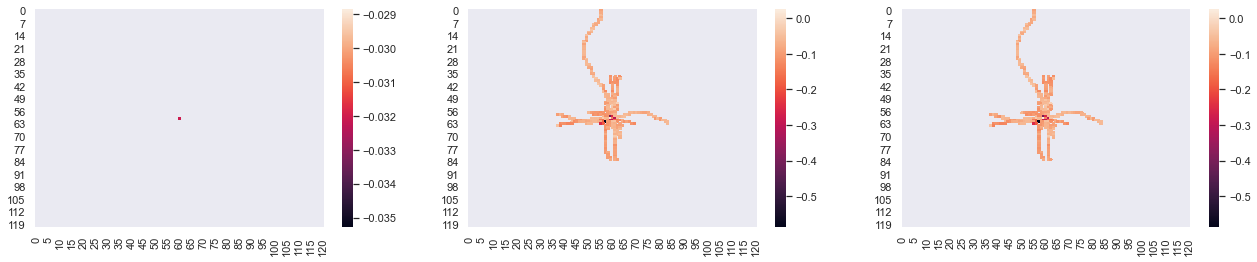

In [25]:
# 在进行step可视化的时候，实际上需要知道data_gap，然后用data_gap/5000得到需要叠加的个数
# 如何叠加？
# 直接在同一位置重复作画： NO，会产生多个label bar
# 先对数组进行合并，然后画图，关键是如何合并。。。
fig, axes = plt.subplots(1, 3, figsize=(22, 4))
sns.heatmap(ax=axes[0], data=data_list[0][5, :, :])
sns.heatmap(ax=axes[1], data=data_list[1][5, :, :])

array1 = data_list[0][5, :, :]
array2 = data_list[1][5, :, :]
array3 = array1.copy()
array3[np.isfinite(array2)] = array2[np.isfinite(array2)]

sns.heatmap(ax=axes[2], data=array3)

In [ ]:
array1 = data_list[0][5, :, :]
array2 = data_list[1][5, :, :]
# index = np.where(array1 == np.nan)
index = np.isfinite(array1)
array3 = array1.copy()
array3[np.isfinite(array2)] = array2[np.isfinite(array2)]
# print(index[0])
# print(array1[index])
# create a new array
# array3 = array2.copy()
# array3[array1[:, :]!=np.nan]=array1

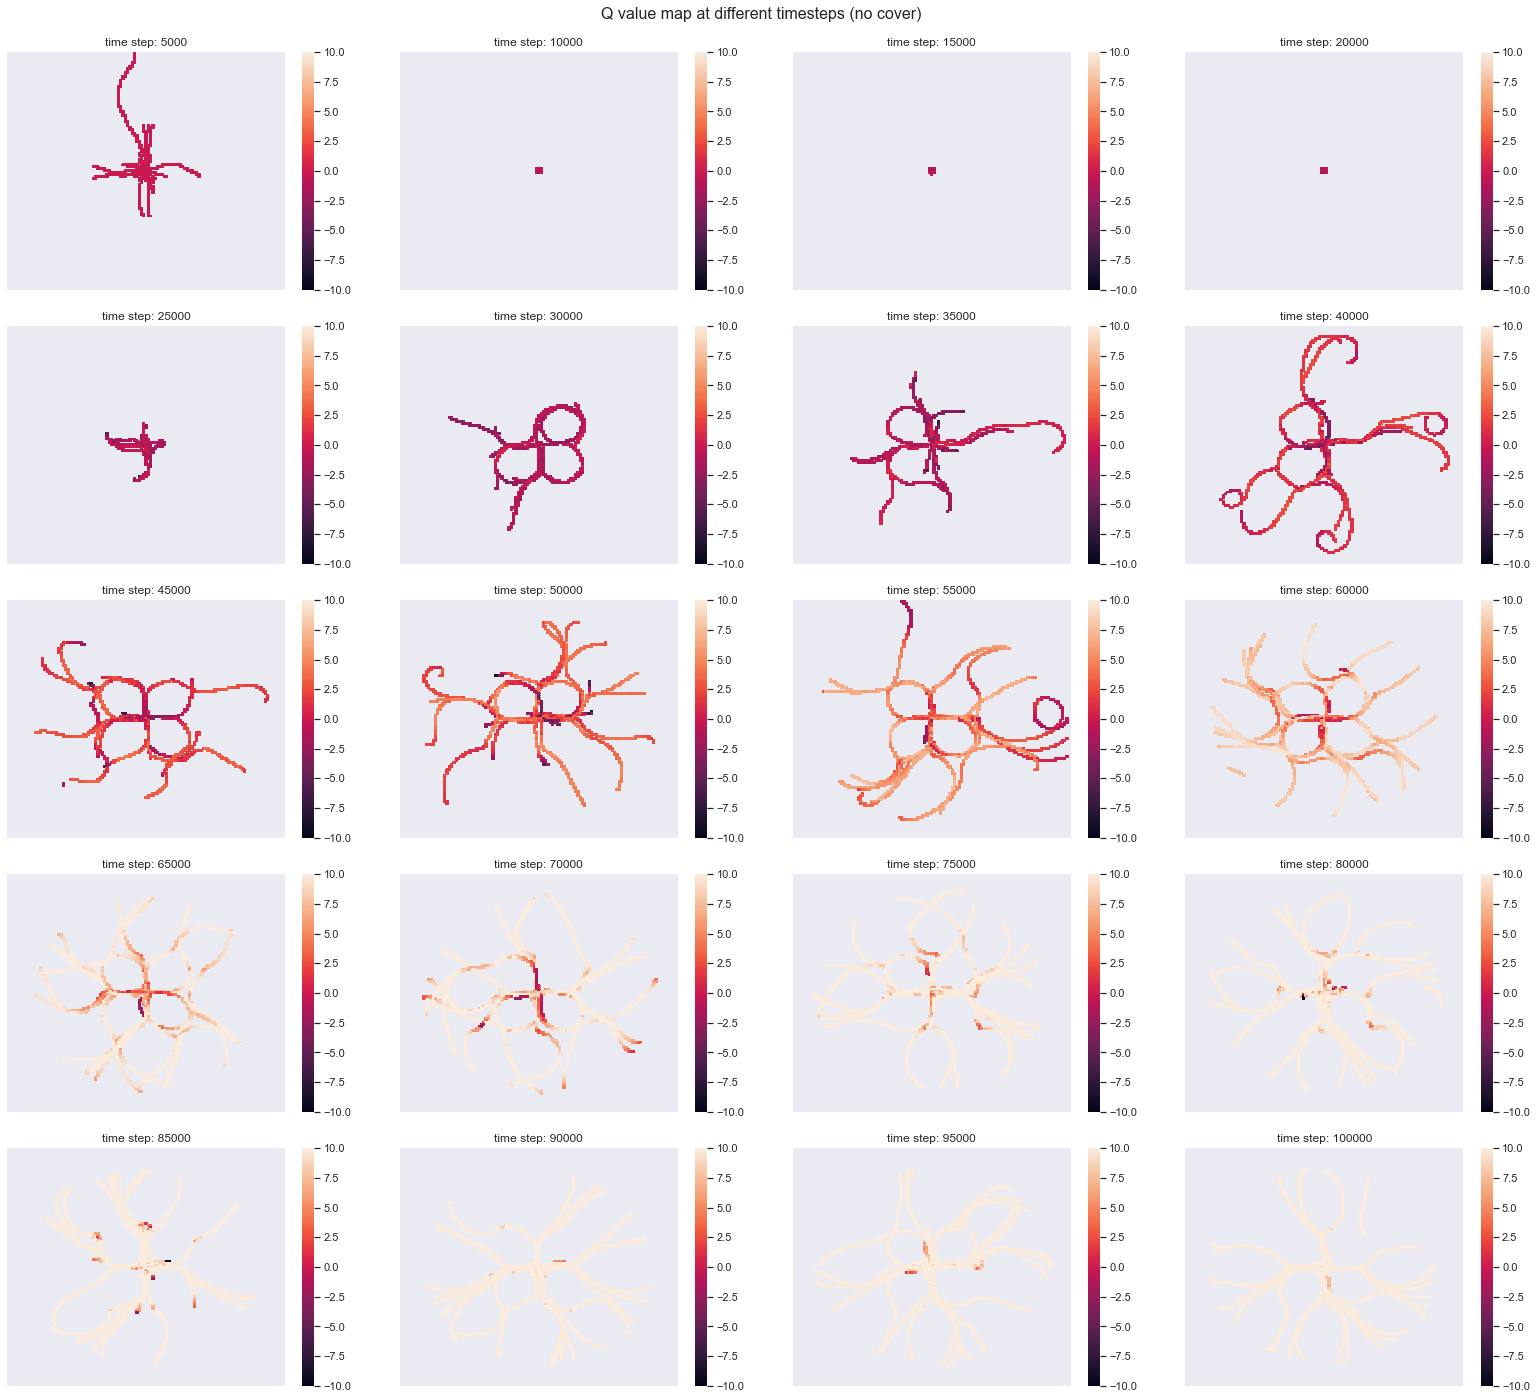

In [21]:
plot_heat_map_step('Q value map at different timesteps (no cover)', 5, 'q_values_step', value_min=-10, value_max=10)
# plot_heat_map_step('Action 0 at different timesteps (no cover)', 6, 'action_0_step')
# plot_heat_map_step('Action 1 at different timesteps (no cover)', 7, 'action_1_step')
# plot_heat_map_step('Reward at different timesteps (no cover)', 8, 'reward_step')

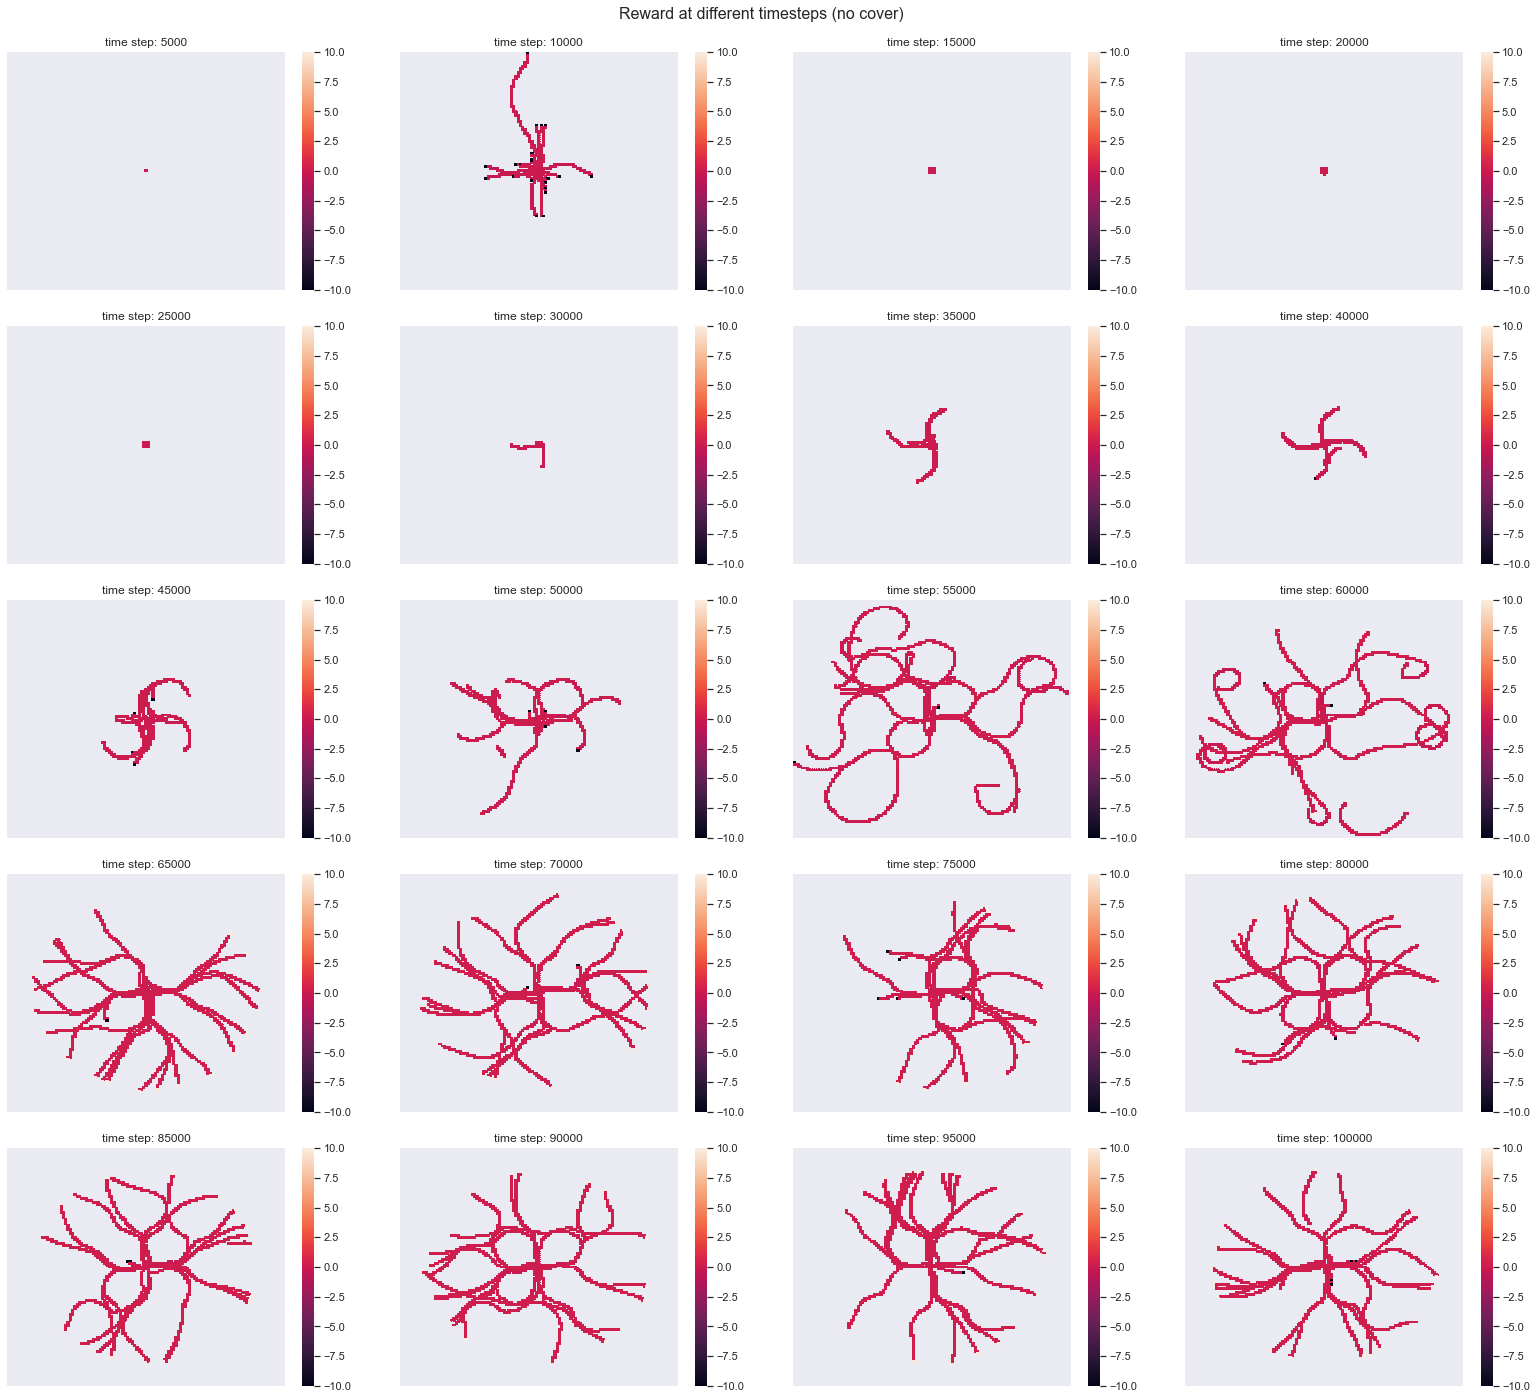

In [35]:
plot_heat_map_step('Reward at different timesteps (no cover)', 8, 'reward_step', value_min=-10, value_max=10)

In [ ]:
data_ori = data_list[-1][:, :, :]

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
fig.suptitle('steps', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.98))
data_all=data_ori.copy()
data_all[0, data_all[3,:,:] > 100000] = np.nan
sns.heatmap(data=data_all[0, :, :])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.savefig(data_path + '3-steps', dpi=300)

In [ ]:
step_plot_cover_num = int(data_gap/5000)
print(step_plot_cover_num)
